# examine test loss/precision/tdr/fdr for different models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
expts = ['binomial', 'multinomial_KLonly', 'binomial_KLonly']
results = {}
test_results = {}
train_results = {}
for expt in expts:
    results[expt] = pd.read_csv(f'/h2/kspivakovsky/topaz/tutorial/saved_models/EMPIAR-10025/{expt}/model_training.txt', sep='\t')
    test_results[expt] = results[expt].loc[results[expt]['split'] == 'test']
    train_results[expt] = results[expt].loc[results[expt]['split'] == 'train'].loc[results[expt]['iter'] % 1000 == 0]



In [3]:
test_results['binomial']

,epoch,iter,split,loss,ge_penalty,precision,adjusted_precision,tpr,fpr,auprc
1000,1,1001,test,0.179081,-,0.016860,0.134883,0.824021,0.078499,0.04747482237042569
2001,2,2001,test,0.230766,-,0.017517,0.140139,0.836702,0.076666,0.04078590118073438
3002,3,3001,test,0.220793,-,0.018321,0.146569,0.844168,0.073896,0.044916902854057826
4003,4,4001,test,0.241959,-,0.019369,0.154951,0.868489,0.071836,0.044967991027476416
5004,5,5001,test,0.243318,-,0.018257,0.146057,0.872184,0.076622,0.043938212535902445
6005,6,6001,test,0.221906,-,0.019890,0.159122,0.854431,0.068784,0.04345029386828626
7006,7,7001,test,0.304035,-,0.018771,0.150166,0.926022,0.079084,0.05147479117566917
8007,8,8001,test,0.324849,-,0.018978,0.151823,0.887855,0.074981,0.044259088852240884
9008,9,9001,test,0.279299,-,0.018141,0.145128,0.894555,0.079099,0.04574840875953994
10009,10,10001,test,0.219403,-,0.021260,0.170084,0.865908,0.065124,0.04643075447508782


In [ ]:
# %%bash
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
import glob
import os
from topaz.utils.data.loader import load_image
import pdb, topaz
from topaz.main import main

# KLonly gaussian approx of binom
cmd = "train -n 400 --num-workers=8 --train-images /h2/kspivakovsky/topaz_tutorial_data/EMPIAR-10025/processed/micrographs/image_list_train.txt --train-targets /h2/kspivakovsky/topaz_tutorial_data/EMPIAR-10025/processed/micrographs/14sep05c_c_00007gr_00013sq_00004hl_00003es_c_train.txt --test-images /h2/kspivakovsky/topaz_tutorial_data/EMPIAR-10025/processed/micrographs/image_list_test.txt --test-targets /h2/kspivakovsky/topaz_tutorial_data/EMPIAR-10025/processed/micrographs/14sep05c_c_00007gr_00013sq_00004hl_00003es_c_test.txt --save-prefix=saved_models/EMPIAR-10025/binomial_gaussian_approx_KLonly/model -o saved_models/EMPIAR-10025/binomial_gaussian_approx_KLonly/model_training.txt"

pdb.run(topaz.main.main(cmd))

Namespace(command='train', describe=False, device=0, num_workers=8, num_threads=0, train_images='/h2/kspivakovsky/topaz_tutorial_data/EMPIAR-10025/processed/micrographs/image_list_train.txt', train_targets='/h2/kspivakovsky/topaz_tutorial_data/EMPIAR-10025/processed/micrographs/14sep05c_c_00007gr_00013sq_00004hl_00003es_c_train.txt', test_images='/h2/kspivakovsky/topaz_tutorial_data/EMPIAR-10025/processed/micrographs/image_list_test.txt', test_targets='/h2/kspivakovsky/topaz_tutorial_data/EMPIAR-10025/processed/micrographs/14sep05c_c_00007gr_00013sq_00004hl_00003es_c_test.txt', format_='auto', image_ext='', k_fold=0, fold=0, cross_validation_seed=42, num_particles=400.0, pi=None, radius=3, method='GE-binomial', slack=-1, autoencoder=0, l2=0.0, learning_rate=0.0002, natural=False, minibatch_size=256, minibatch_balance=0.0625, epoch_size=1000, num_epochs=10, pretrained=True, model='resnet8', units=32, dropout=0.0, bn='on', pooling=None, unit_scaling=2, ngf=32, patch_size=96, patch_paddin

# Loading model: resnet8
# Model parameters: units=32, dropout=0.0, bn=on
# Loading pretrained model: resnet8_u32
# Receptive field: 71
# Using device=0 with cuda=True
# When using GPU to load data, we only load in this process. Setting num_workers = 0.
# Training...
# source	split	p_observed	num_positive_regions	total_regions
# 0	train	1.14174e-02	203000	17779860
# 0	test	1.14174e-02	101500	8889930
# Specified expected number of particle per micrograph = 400.0
# With radius = 3
# Setting pi = 0.09133930188426681
# Estimated max precision given pi and p_observed: 0.125
# If your adjusted precision is greater than 1.0 (especially on a test split), you have likely set pi too high.
# minibatch_size=256, epoch_size=1000, num_epochs=10
# Loaded 20 training micrographs with ~1000 labeled particles
# Loaded 10 testing micrographs with 500 labeled particles


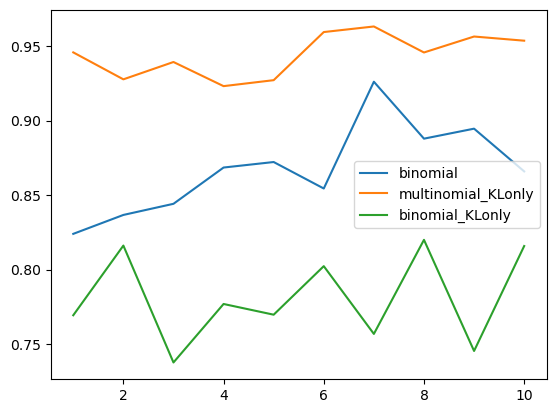

In [25]:
for expt in expts:
    # plt.plot(test_results[expt].epoch, test_results[expt].adjusted_precision, label=expt)
    plt.plot(test_results[expt].epoch, test_results[expt].tpr, label=expt)

plt.ylabel = 'h'
plt.legend()
plt.show()

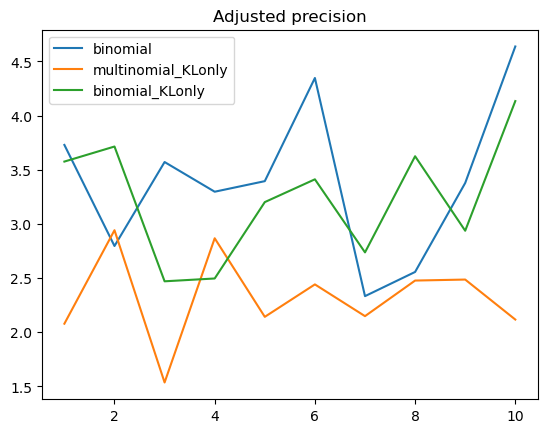

In [29]:
for expt in expts:
    plt.plot(train_results[expt].epoch, train_results[expt].adjusted_precision, label=expt)

plt.legend()
plt.title('Adjusted precision')
plt.show()

# for fun look at actual images and predictions

In [4]:
## load the labeled particles
labeled_particles = pd.read_csv('/h2/kspivakovsky/topaz_tutorial_data/EMPIAR-10025/processed/particles.txt', sep='\t')

In [5]:
labeled_particles

,image_name,x_coord,y_coord
0,14sep05c_c_00003gr_00014sq_00004hl_00004es_c,866,310
1,14sep05c_c_00003gr_00014sq_00004hl_00004es_c,632,697
2,14sep05c_c_00003gr_00014sq_00004hl_00004es_c,366,190
3,14sep05c_c_00003gr_00014sq_00004hl_00004es_c,350,448
4,14sep05c_c_00003gr_00014sq_00004hl_00004es_c,470,817
...,...,...,...
1495,14sep05c_c_00007gr_00013sq_00014hl_00004es_c,498,917
1496,14sep05c_c_00007gr_00013sq_00014hl_00004es_c,336,72
1497,14sep05c_c_00007gr_00013sq_00014hl_00004es_c,468,339
1498,14sep05c_c_00007gr_00013sq_00014hl_00004es_c,138,361
